# Consumir dados API- Company Overview - www.alphavantage.co

## Capturar dados Básicos

### Importação Básica

In [362]:
!pip install python-dotenv
!pip install requests
!pip install yfinance
!pip install mplfinance
!pip install seaborn

In [363]:
from dotenv import load_dotenv
import os
import requests
import json
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [364]:
# Acessando as variáveis:
load_dotenv()
api_key = os.getenv('API_KEY2')
base_url = os.getenv('BASE_URL_OVERVIEW')

# Lista de símbolos das empresas
symbols = ['GOOGL', 'AAPL', 'NVDA']

In [365]:
# Função para obter o resumo de uma empresa
def get_company_overview(base_url, symbol, api_key):
    url = f'{base_url}&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)    
    if response.status_code == 200:
        data = response.json()
        if 'Information' in data and data['Information']:
            return 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day.'
        elif symbol in data['Symbol']:
            # Extrai os dados relevantes
            df_data = {
                "Symbol": data['Symbol'],
                "AssetType": data['AssetType'],
                "Name": data['Name'],
                "Description": data['Description'],
                "CIK": data['CIK'],
                "Exchange": data['Exchange'],
                "Currency": data['Currency'],
                "Country": data['Country'],
                "Sector": data['Sector'],
                "Industry": data['Industry'],
                "Address": data['Address'],
                "OfficialSite": data['OfficialSite'],
                "FiscalYearEnd": data['FiscalYearEnd'],
                "LatestQuarter": data['LatestQuarter'],
                "MarketCapitalization": data['MarketCapitalization'],
                "EBITDA": data['EBITDA'],
                "PERatio": data['PERatio'],
                "PEGRatio": data['PEGRatio'],
                "BookValue": data['BookValue'],
                "DividendPerShare": data['DividendPerShare'],
                "DividendYield": data['DividendYield'],
                "EPS": data['EPS'],
                "RevenuePerShareTTM": data['RevenuePerShareTTM'],
                "ProfitMargin": data['ProfitMargin'],
                "OperatingMarginTTM": data['OperatingMarginTTM'],
                "ReturnOnAssetsTTM": data['ReturnOnAssetsTTM'],
                "ReturnOnEquityTTM": data['ReturnOnEquityTTM'],
                "RevenueTTM": data['RevenueTTM'],
                "GrossProfitTTM": data['GrossProfitTTM'],
                "DilutedEPSTTM": data['DilutedEPSTTM'],
                "QuarterlyEarningsGrowthYOY": data['QuarterlyEarningsGrowthYOY'],
                "QuarterlyRevenueGrowthYOY": data['QuarterlyRevenueGrowthYOY'],
                "AnalystTargetPrice": data['AnalystTargetPrice'],
                "AnalystRatingStrongBuy": data['AnalystRatingStrongBuy'],
                "AnalystRatingBuy": data['AnalystRatingBuy'],
                "AnalystRatingHold": data['AnalystRatingHold'],
                "AnalystRatingSell": data['AnalystRatingSell'],
                "AnalystRatingStrongSell": data['AnalystRatingStrongSell'],
                "TrailingPE": data['TrailingPE'],
                "ForwardPE": data['ForwardPE'],
                "PriceToSalesRatioTTM": data['PriceToSalesRatioTTM'],
                "PriceToBookRatio": data['PriceToBookRatio'],
                "EVToRevenue": data['EVToRevenue'],
                "EVToEBITDA": data['EVToEBITDA'],
                "Beta": data['Beta'],
                "52WeekHigh": data['52WeekHigh'],
                "52WeekLow": data['52WeekLow'],
                "50DayMovingAverage": data['50DayMovingAverage'],
                "200DayMovingAverage": data['200DayMovingAverage'],
                "SharesOutstanding": data['SharesOutstanding'],
                "DividendDate": data['DividendDate'],
                "ExDividendDate": data['ExDividendDate']
            }

            overview =  pd.DataFrame(df_data, index=['symbol'])  # Alternatively, return the entire overview dictionary
            return overview
        else:
            print(f"Erro: 'Overview' não encontrado para {symbol}")
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None

### Analise Fundamentalista

#### Avaliação

In [366]:
# get_company_overview(base_url, 'AAPL', api_key)

In [367]:
df_list = pd.DataFrame()
# Loop para obter o resumo de cada empresa
for symbol in symbols:
    overview = get_company_overview(base_url, symbol, api_key)
    df_list = pd.concat([df_list, overview])

In [368]:
df_list.head()    

,Symbol,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
symbol,GOOGL,Common Stock,Alphabet Inc Class A,Alphabet Inc. is an American multinational con...,1652044,NASDAQ,USD,USA,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",...,6.02,17.12,1.046,191.75,120.07,174.55,155.49,5859000000,2024-09-16,2024-09-09
symbol,AAPL,Common Stock,Apple Inc,Apple Inc. is an American multinational techno...,320193,NASDAQ,USD,USA,TECHNOLOGY,ELECTRONIC COMPUTERS,...,9.05,25.81,1.244,236.96,163.67,220.14,193.0,15204100000,2024-08-15,2024-08-12
symbol,NVDA,Common Stock,NVIDIA Corporation,Nvidia Corporation is an American multinationa...,1045810,NASDAQ,USD,USA,MANUFACTURING,SEMICONDUCTORS & RELATED DEVICES,...,39.64,62.4,1.68,140.76,39.22,120.9,86.08,24598301000,2024-06-28,2024-06-11


In [369]:
#import pandas as pd
import re

def convert_data_types(df):
    """
    Converts columns in a DataFrame to appropriate data types.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with converted data types.
    """

    for col in df.columns:
        try:
            # Check for integers
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col] = pd.to_numeric(df[col], errors='coerce')
            # Check for floats
            elif re.search(r"^\d+\.\d+$", str(df[col].iloc[0])):  # Check first value for pattern
                df[col] = pd.to_numeric(df[col], errors='coerce')
            # Check for dates (basic format)
            elif re.search(r"^\d{4}-\d{2}-\d{2}$", str(df[col].iloc[0])):
                df[col] = pd.to_datetime(df[col], errors='coerce')
            # Keep strings as strings
            else:
                df[col] = df[col].astype(str)
        except:
            # Handle potential errors during conversion
            pass

    return df

In [370]:
df_list = convert_data_types(df_list)
#Convertendo tipo de dados - Ficou de fora do tratamento de tipo
df_list['MarketCapitalization'] = pd.to_numeric(df_list['MarketCapitalization'])

# Alterando a formatação global (temporário)
pd.options.display.float_format = '{:.2f}'.format

In [371]:
# Concatenar os DataFrames
#df_final = pd.concat(df_list, ignore_index=True)

#print(df_list.columns)


In [372]:
# Calculate P/L
df_list['P/L'] = df_list['MarketCapitalization'] / df_list['EPS']
#df_list['P/L'] = df_list['P/L'].round(2)

# Calculate P/B
df_list['P/B'] = df_list['MarketCapitalization'] / df_list['BookValue']
#df_list['P/B'] = df_list['P/B'].round(2)

# Calculate EV
#df_list['EV'] = df_list['MarketCapitalization'] + df_list['TotalDebt'] - df_list['CashAndCashEquivalents']

# Calculate EV/EBITDA - Campo já existe: EVToEBITDA
#df_list['EV/EBITDA'] = df_list['EV'] / df_list['EBITDA']

In [373]:
# Exibir os resultados
print(df_list[['Symbol', 'P/L', 'P/B', 'EVToEBITDA']])

       Symbol              P/L              P/B  EVToEBITDA
symbol  GOOGL  293957675466.28   83936296517.82       17.12
symbol   AAPL  524148641337.39  787060260155.18       25.81
symbol   NVDA 1860983711111.11 1592733806806.81       62.40


#### Rentabilidade

In [374]:
# Verificando os campos do OverViewer já fornece os dados necessários

## Analise Técnica

### Preparar dados histórico dos preços das ações

In [375]:
# Obtendo dados históricos da Apple
#for symbol in symbols:
def obter_preco_acoes(symbol, start, end):
    return yf.download(symbol, start, end) 


In [376]:
start = input('Data inicio:')
end = input('Data fin: ')

# Criar um DataFrame para armazenar os dados
data = pd.DataFrame()

In [377]:
for symbol in symbols:
    df = obter_preco_acoes(symbol, start, end)
    df['symbol'] = symbol
    data = pd.concat([data, df])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Informações Básicas

In [378]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2024-06-03,172.54,174.53,171.16,173.17,172.97,27459100,GOOGL
2024-06-04,173.28,173.85,171.89,173.79,173.59,26879600,GOOGL
2024-06-05,175.20,176.65,173.93,175.41,175.21,22068500,GOOGL
2024-06-06,175.90,177.15,175.75,176.73,176.53,23251000,GOOGL
2024-06-07,177.05,177.87,174.30,174.46,174.26,19661400,GOOGL


In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2024-06-03 to 2024-08-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       171 non-null    float64
 1   High       171 non-null    float64
 2   Low        171 non-null    float64
 3   Close      171 non-null    float64
 4   Adj Close  171 non-null    float64
 5   Volume     171 non-null    int64  
 6   symbol     171 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ KB


In [380]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,171.00,171.00,171.00,171.00,171.00,171.00
mean,170.75,173.15,168.42,170.84,170.76,145915128.07
std,40.51,40.44,40.88,40.65,40.57,158862769.57
min,92.06,103.41,90.69,98.91,98.91,10242100.00
25%,127.43,129.84,125.13,127.33,127.33,27169350.00
50%,175.46,177.06,174.15,175.41,175.21,56713900.00
75%,210.94,214.22,208.72,210.22,209.98,257976250.00
max,236.48,237.23,233.09,234.82,234.55,664696000.00


### Candlestick

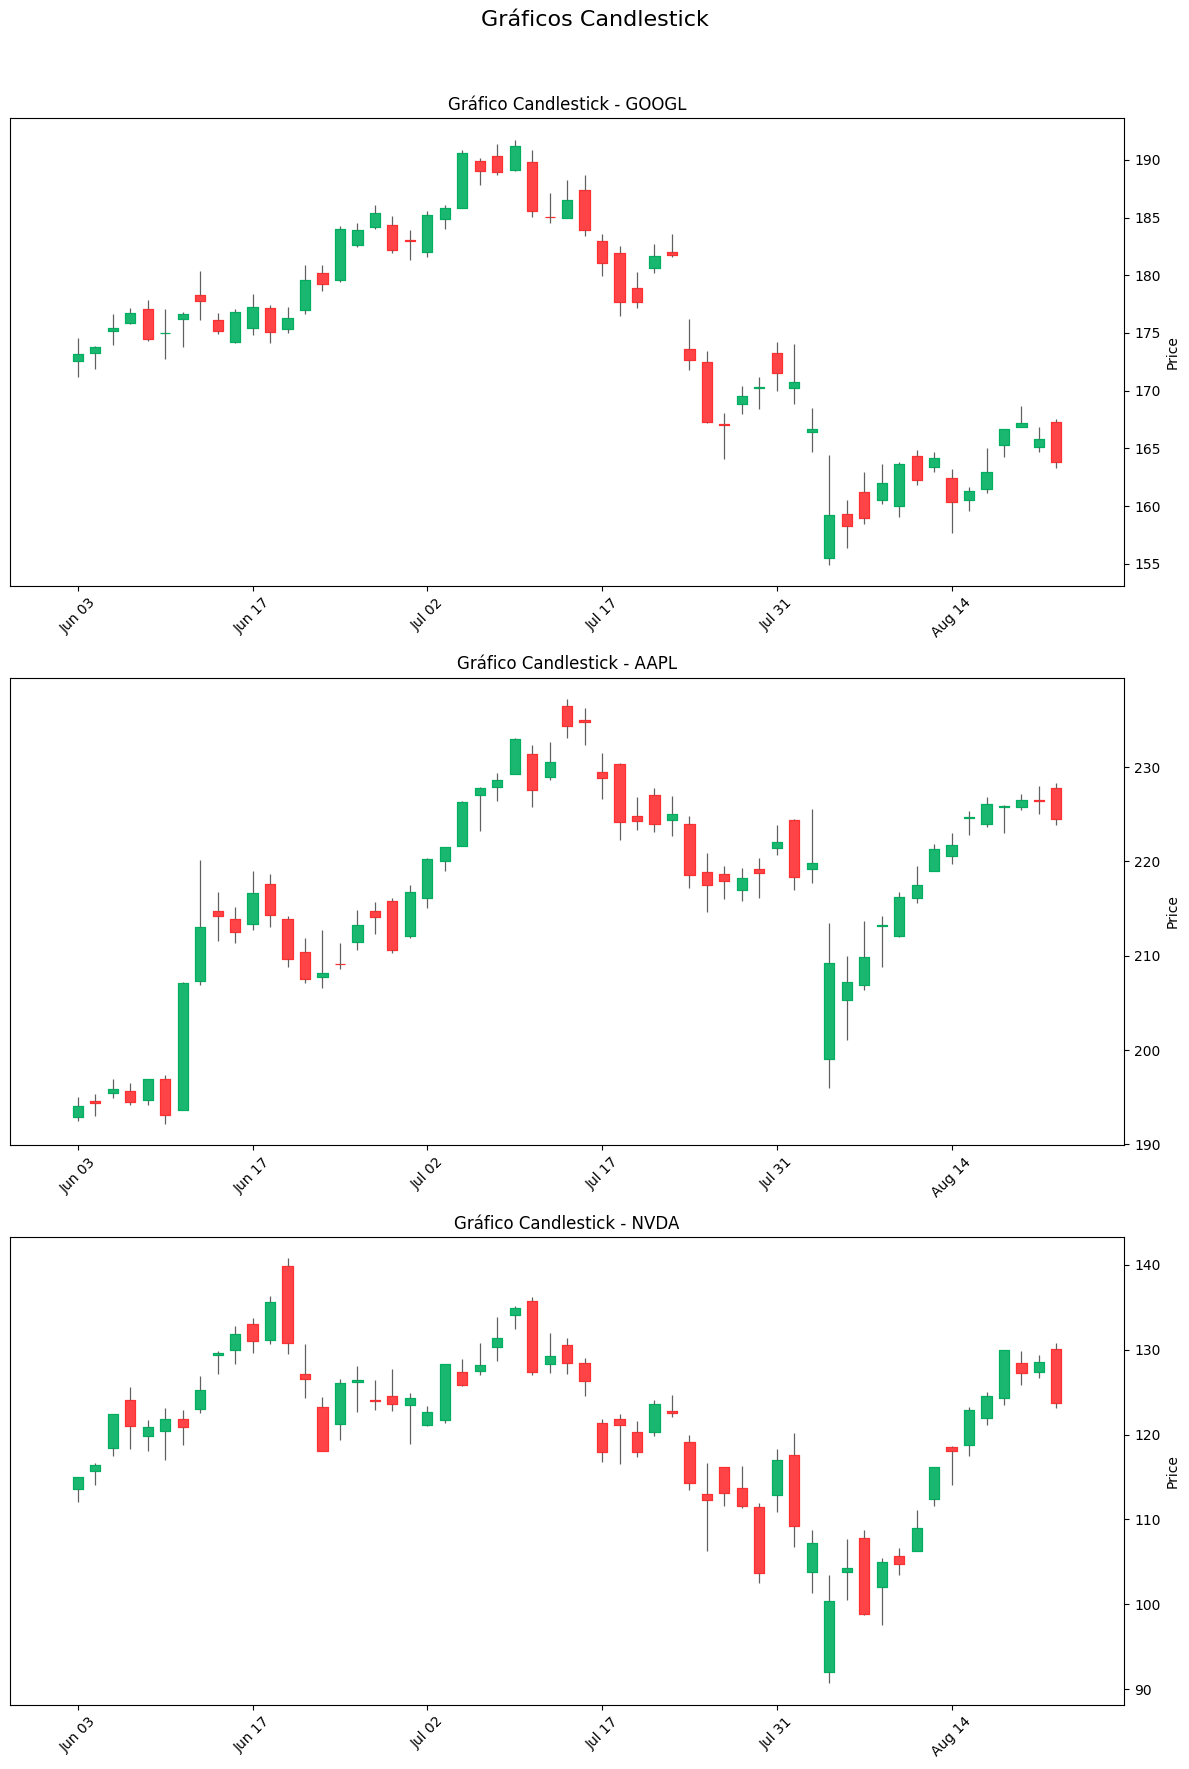

In [381]:

# Criar uma figura com múltiplos subplots
fig, axes = plt.subplots(nrows=len(symbols), ncols=1, figsize=(12, 6 * len(symbols)))

# Ajusta o layout para evitar sobreposição
fig.tight_layout(pad=4.0)

# Se houver apenas um gráfico, axes será um único eixo, então transforme em uma lista
if len(symbols) == 1:
    axes = [axes]

# Configura os gráficos de candlestick para cada símbolo
for i, symbol in enumerate(symbols):
    # Verificar se o símbolo existe no DataFrame
    if symbol in data['symbol'].values:
        group = data[data['symbol'] == symbol]
        ax = axes[i]

        # Plota o gráfico de candlestick
        mpf.plot(group[['Open', 'High', 'Low', 'Close']], type='candle', style='yahoo', ax=ax)

        # Define o título do gráfico
        ax.set_title(f'Gráfico Candlestick - {symbol}', fontsize=12)
    else:
        print(f"O símbolo '{symbol}' não foi encontrado no DataFrame.")

# Adiciona um título geral para a figura
fig.suptitle('Gráficos Candlestick', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Exibir os gráficos
plt.show()

### Indicadores Fundamentalista

### Indicadores Técnicos

#### Calcular Médias Moveis Simples - MMS

In [382]:
def calculate_sma(data, column, window_size):
  """
  Calculates the Simple Moving Average (SMA) for a given column and window size.

  Args:
    data: Pandas DataFrame containing the data.
    column: The name of the column to calculate the SMA for.
    window_size: The number of periods for the SMA calculation.

  Returns:
    A Pandas Series containing the SMA values.
  """

  sma = data[column].rolling(window=window_size).mean()
  return sma

# Exemplo de uso:
data['MMS_15'] = calculate_sma(data, 'Close', 15)

#Preencher DataFrame com próximo valor válido
data['MMS_15'] = calculate_sma(data, 'Close', 15).bfill()

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2024-06-03 to 2024-08-22
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       171 non-null    float64
 1   High       171 non-null    float64
 2   Low        171 non-null    float64
 3   Close      171 non-null    float64
 4   Adj Close  171 non-null    float64
 5   Volume     171 non-null    int64  
 6   symbol     171 non-null    object 
 7   MMS_15     171 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.0+ KB


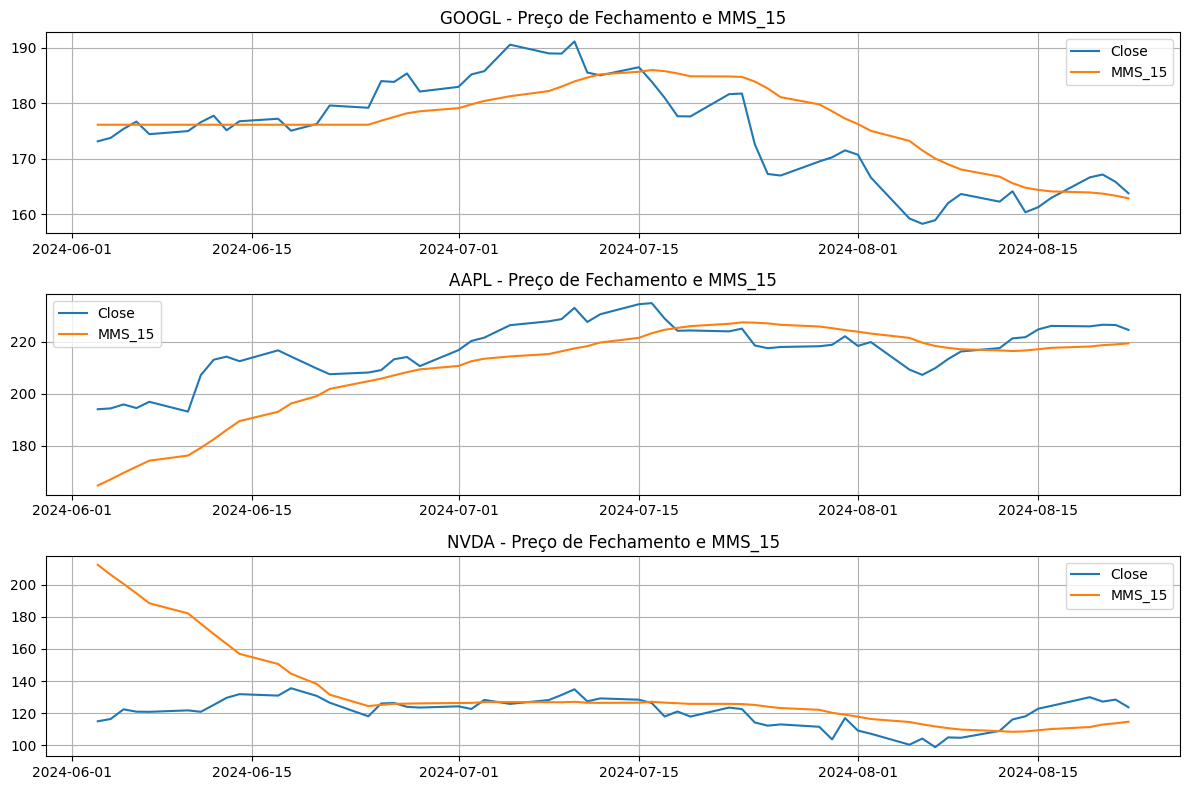

In [384]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Filtrando o DataFrame para as ações desejadas
filtered_data = data[data['symbol'].isin(symbols)]

# Criando subplots para visualizar múltiplos gráficos em uma mesma figura
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

# Iterando sobre as ações e criando gráficos
for i, symbol in enumerate(symbols):
    symbol_data = filtered_data[filtered_data['symbol'] == symbol]
    axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    axes[i].plot(symbol_data.index, symbol_data['MMS_15'], label='MMS_15')
    axes[i].set_title(f"{symbol} - Preço de Fechamento e MMS_15")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### MACD para gerar sinais de compra e venda

In [385]:


# Calculando o MACD
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    """
    Calcula o MACD, a linha de sinal e o histograma.

    Args:
        data: DataFrame com os dados.
        short_period: Período da média móvel curta (default: 12).
        long_period: Período da média móvel longa (default: 26).
        signal_period: Período da média móvel do sinal (default: 9).

    Returns:
        Um DataFrame com as colunas MACD, signal e hist.
    """

    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    hist = macd - signal
    return pd.DataFrame({'macd': macd, 'signal': signal, 'hist': hist})

# Adicionando o MACD ao DataFrame
macd_data = calculate_macd(data)
data = pd.concat([data, macd_data], axis=1)

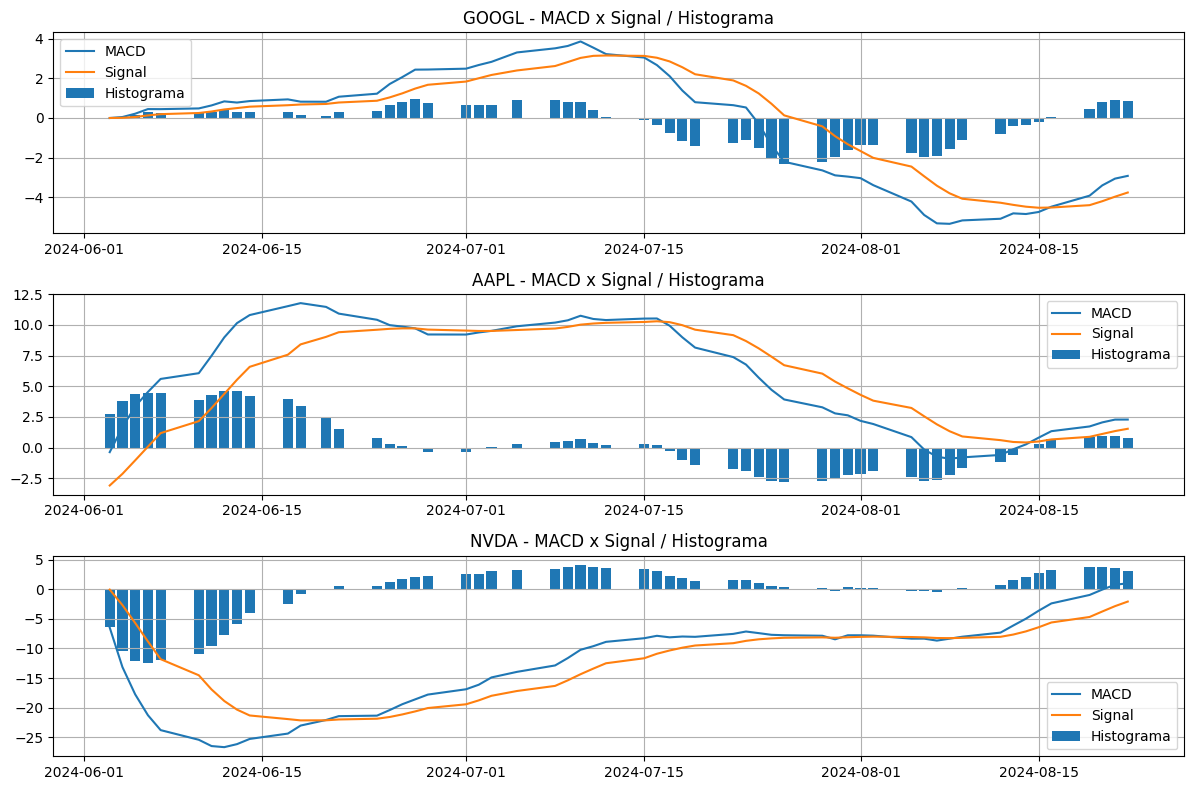

In [386]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Verificando e preenchendo valores NaN (se necessário)
data = data.ffill()  # Preenche com o valor anterior

# Criando subplots
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]

    # Plotando o preço de fechamento, MMS_15 e MACD
    #axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    #axes[i].plot(symbol_data.index, symbol_data['MMS_15'], label='MMS_15')
    axes[i].plot(symbol_data.index, symbol_data['macd'], label='MACD')
    axes[i].plot(symbol_data.index, symbol_data['signal'], label='Signal')
    axes[i].bar(symbol_data.index, symbol_data['hist'], label='Histograma')

    # Adicionando título, legenda e grid
    axes[i].set_title(f"{symbol} - MACD x Signal / Histograma")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### RSI (Relative Strength Index)

In [387]:
#import pandas as pd
#import numpy as np

def calculate_rsi(data, period=14):
    """
    Calcula o RSI para um DataFrame de dados.

    Args:
        data: DataFrame com a coluna 'Close'.
        period: Período para o cálculo do RSI (default: 14).

    Returns:
        Um DataFrame com a coluna 'RSI'.
    """

    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Aplicando a função ao DataFrame
data['RSI'] = calculate_rsi(data)

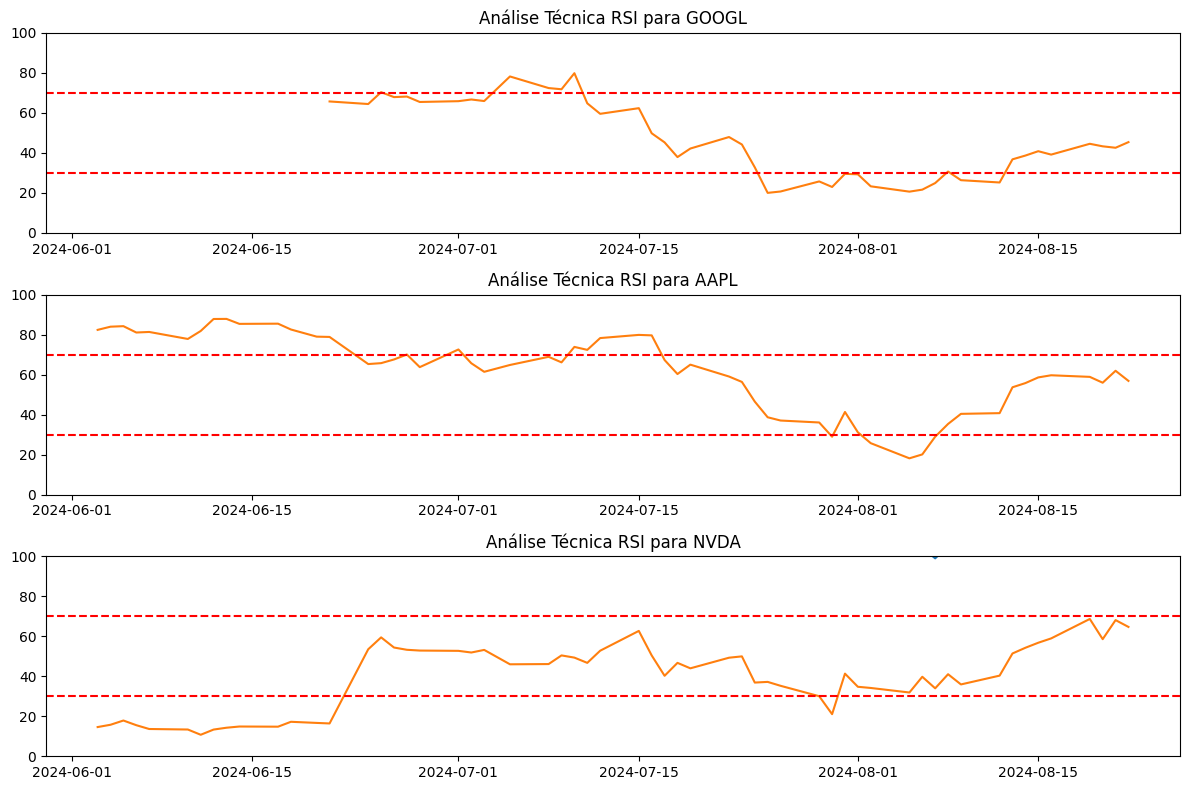

In [388]:
# Verificando e preenchendo valores NaN (se necessário)
data['RSI'] = data['RSI'].ffill()  # Preenche com o valor anterior

# Criando subplots
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]

    # Plotando o preço de fechamento, MMS_15, MACD e RSI
    axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    # ... (outros plots)
    axes[i].plot(symbol_data.index, symbol_data['RSI'], label='RSI')

    # Adicionando níveis de sobrecompra e sobrevenda
    axes[i].axhline(70, color='r', linestyle='--')
    axes[i].axhline(30, color='r', linestyle='--')

    # Adicionando título ao gráfico
    axes[i].set_title(f"Análise Técnica RSI para {symbol}")

    # Ajustando os limites do eixo y (opcional)
    axes[i].set_ylim(0, 100)

    
    # ... (resto do código para personalização)

plt.tight_layout()
plt.show()

#### Criando Estratégias de Negociação Baseadas em RSI e MACD

In [389]:
def generate_signals(data, rsi_overbought=70, rsi_oversold=30):
    """
    Gera sinais de compra e venda com base no cruzamento do MACD e nos níveis do RSI.

    Args:
        data: DataFrame com os dados históricos.
        rsi_overbought: Nível de sobrecompra para o RSI.
        rsi_oversold: Nível de sobrevenda para o RSI.

    Returns:
        DataFrame com os sinais de compra e venda.
    """

    # Criar uma nova coluna para os sinais
    data['signal_cv'] = 0

    # Condição de compra: MACD cruza para cima da linha de sinal e RSI abaixo do nível de sobrevenda
    data.loc[(data['macd'] > data['signal']) & (data['RSI'] < rsi_oversold), 'signal_cv'] = 1

    # Condição de venda: MACD cruza para baixo da linha de sinal e RSI acima do nível de sobrecompra
    data.loc[(data['macd'] < data['signal']) & (data['RSI'] > rsi_overbought), 'signal_cv'] = -1

    return data

In [390]:
data = generate_signals(data)

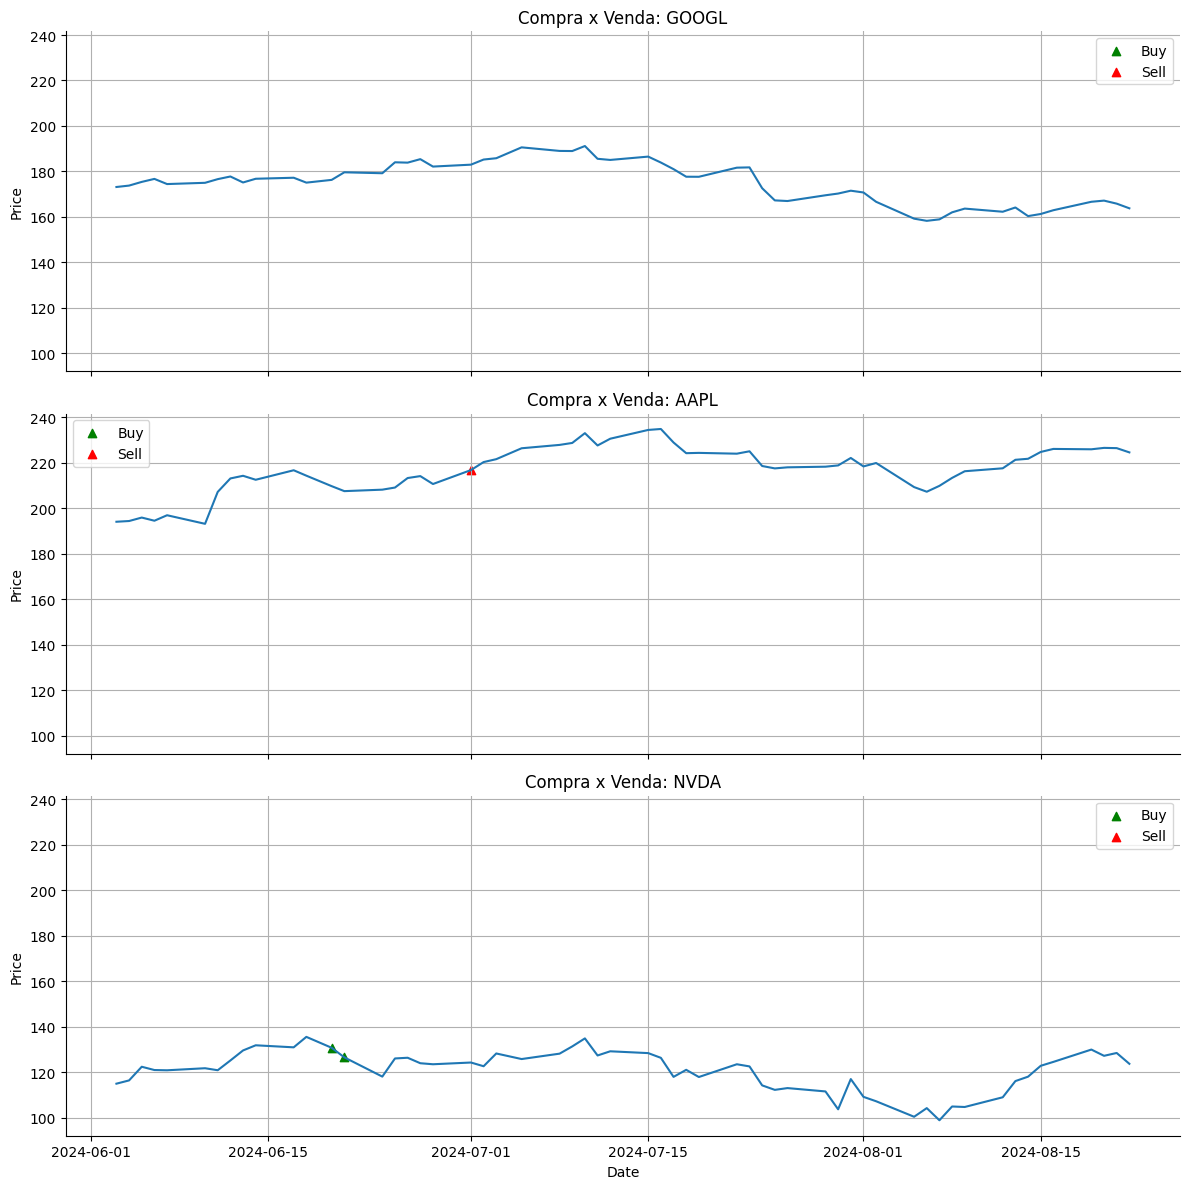

In [391]:
# Resetar o índice do DataFrame para tornar 'index' uma coluna
data_reset = data.reset_index()
data_reset.rename(columns={'index': 'Date'}, inplace=True)

# Criar os subplots em uma única coluna
g = sns.FacetGrid(data_reset, col="symbol", col_wrap=1, height=4, aspect=3)

# Plotar o preço de fechamento
g.map(plt.plot, 'Date', 'Close')

# Plotar sinais de compra e venda
for ax in g.axes.flat:
    symbol = ax.get_title().split('=')[-1].strip()
    df_symbol = data_reset[data_reset['symbol'] == symbol]
    
    # Plotar sinais de compra
    buy_signals = df_symbol[df_symbol['signal_cv'] == 1]
    ax.scatter(buy_signals['Date'], buy_signals['Close'], color='green', marker='^', label='Buy')

    # Plotar sinais de venda
    sell_signals = df_symbol[df_symbol['signal_cv'] == -1]
    ax.scatter(sell_signals['Date'], sell_signals['Close'], color='red', marker='^', label='Sell')

    # Adicionar rótulos, título e grid
    ax.set_title(f"Compra x Venda: {symbol}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


### Dados Dividendos

#### Obter Dados API

In [392]:
load_dotenv()
#api_key = os.getenv('API_KEY2')
base_url = os.getenv('BASE_URL_DIVIDENDS')

In [420]:
def get_dividends(base_url, symbol, api_key):
  """
  Extrai os dados de dividendos de uma empresa usando a API Alpha Vantage.

  Args:
    symbol: O símbolo da ação (ex: AAPL, GOOGL).
    api_key: Sua chave de API da Alpha Vantage.

  Returns:
    Um DataFrame pandas com os dados de dividendos, ou None se houver algum erro.
  """
  url = f'{base_url}&symbol={symbol}&apikey={api_key}'
  response = requests.get(url)    
  if response.status_code == 200:
    df = response.json()
    #print(data['symbol'])
    #print(df)
    if 'Information' in df and df['Information']:
      return 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day.'
    elif symbol in df['symbol']:
      df_lista = pd.DataFrame()
      for data in df['data']:
        df_data = {
                  "symbol": symbol,
                  "ex_dividend_date": data['ex_dividend_date'],
                  "declaration_date": data['declaration_date'],
                  "record_date": data['record_date'],
                  "payment_date": data['payment_date'],
                  "amount": data['amount']
        }
        df_data = pd.DataFrame(df_data, index=['symbol'])  # Alternatively, return the entire overview dictionary
        df_lista = pd.concat([df_lista, df_data])
      return df_lista
    else:
      print(f"Erro: 'DIVIDENDS' não encontrado para {symbol}")
  else:
    print(f"Erro na requisição: {response.status_code}")
    return None


In [421]:

# Loop para obter os dados de dividendos de cada empresa
df_dividends = pd.DataFrame()
for symbol in symbols:
  dividends = get_dividends(base_url, symbol, api_key)
  df_dividends = pd.concat([df_dividends, dividends])

In [422]:
df_dividends = convert_data_types(df_dividends)
df_dividends.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, symbol to symbol
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   symbol            101 non-null    object        
 1   ex_dividend_date  101 non-null    datetime64[ns]
 2   declaration_date  33 non-null     datetime64[ns]
 3   record_date       33 non-null     datetime64[ns]
 4   payment_date      33 non-null     datetime64[ns]
 5   amount            101 non-null    float64       
dtypes: datetime64[ns](4), float64(1), object(1)
memory usage: 5.5+ KB


In [423]:
df_dividends.head()

,symbol,ex_dividend_date,declaration_date,record_date,payment_date,amount
symbol,GOOGL,2024-09-09,2024-07-23,2024-09-09,2024-09-16,0.20
symbol,GOOGL,2024-06-10,2024-04-25,2024-06-10,2024-06-17,0.20
symbol,GOOGL,2014-04-03,NaT,NaT,NaT,567.97
symbol,AAPL,2024-08-12,2024-08-01,2024-08-12,2024-08-15,0.25
symbol,AAPL,2024-05-10,2024-05-02,2024-05-13,2024-05-16,0.25
